New to data science, just finished several online courses, and want to put knowledge to practice.
I know that I'm using a simplistic approach to dealing with null values, but just want to keep it simple for the first run through.

In [1]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Open dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
combined_data = [train_data, test_data]

In [2]:
# Look at the first rows in the training set
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Look at the first rows in the test set
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Get summary data for the training set
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 rows in the training dataset.

In [120]:
# Now look at the test set
test_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


There are 418 rows in the test dataset.

In [102]:
# Look at how many null values there are for the different columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The Cabin column has more nulls than values, so I shouldn't rely on this for data analysis.  I will drop this column.

In [103]:
train_data = train_data.drop(['Cabin'], axis='columns')
test_data  = test_data.drop(['Cabin'], axis='columns')

train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null obj

In [5]:
# For simplicity, I will set the variables with null values to the mean and 
# median of the non-null values.
train_data.Age  = train_data.Age.fillna(train_data.Age.median() )
train_data.Fare = train_data.Fare.fillna(train_data.Fare.mean() )

test_data.Age  = test_data.Age.fillna(test_data.Age.median() )
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean() )

In [105]:
train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null obj

In [106]:
# There are still 2 null values for the column Embarked.  Since we can't apply a mean/median 
# for this value, we will put in the most used value in the dataset
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
# I will set Embarked = "S" where it is null
train_data.Embarked  = train_data.Embarked.fillna("S")

The datasets are now without any null values.

To practice what I have learned in courses, I used Gretl to determine which independent variables were more likely to have an influence on the dependent variable (Survival).

I used the Backward eliminination method with multiple logistic regression.  
The model iterations showed the following:
- Model 1 - p-value was highest for Parch, so removed it and reran model
- Model 2 - p-value was highest for Embarked, so removed it and reran model
- Model 3 - p-value was highest for Fare, so removed it and reran model  
- Model 4 - p-value was highest for Ticket, so removed it and reran model
- Model 5 - all remaining independent variables are showing as significant with this model: 
Pclass, Sex, Age, SibSp

Model 5 shows an accuracy percentage of 80.8%.

Will continue on here with Python, using these remaining 4 variables.

Look at distribution of male versus female, and how many survived.

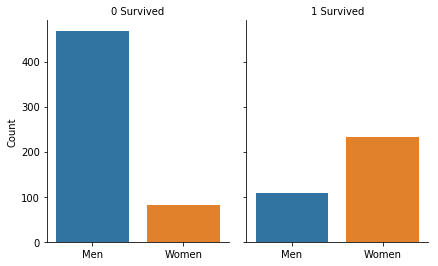

In [108]:
# Use Seaborn category plot 
gender_plot = sns.catplot(x="Sex", col="Survived", data=train_data, kind="count", 
              height=4, aspect=.75)
(gender_plot.set_axis_labels("", "Count")
            .set_xticklabels(["Men", "Women"]) 
            .set_titles("{col_name} {col_var}") )

This shows that females were more likely to survive.

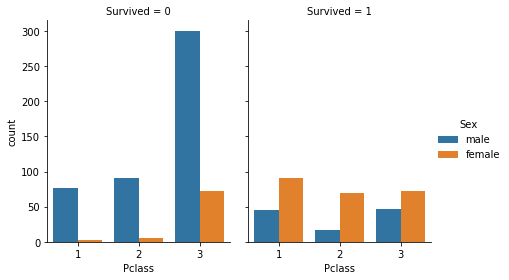

In [109]:
# Look at distribution of survivors by Pclass and gender
class_plot = sns.catplot(x="Pclass", col="Survived", hue="Sex", data=train_data,  
             kind="count", height=4, aspect=.75)

This shows again that females were more likely to survive, and that Pclass is also a factor in survival.

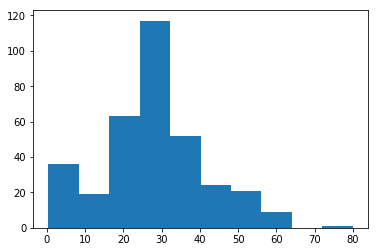

In [110]:
# Look at distribution of survivors by Age, classified into 10 groups
age_plot = plt.hist(train_data[train_data.Survived == 1].Age, bins=10)

This shows that the majority of the surviving passengers are in the age bracket 20-40.

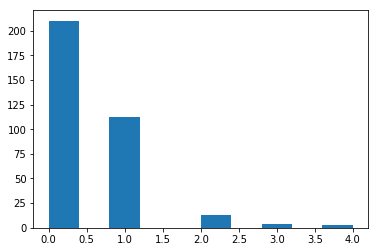

In [111]:
# Look at distribution of survivors by number of siblings or spouse
plcass_plot = plt.hist(train_data[train_data.Survived == 1].SibSp)

This shows that passengers with no sibling/spouse, or just one sibling/spouse were more likely to survive.

All of the plots above confirm possible linearity from the four independent variables, as per the analysis done in Gretl.

In [112]:
# Convert the gender to 0 (male) and (female)
train_data.Sex = [0 if i=="male" else 1 for i in train_data.Sex]
test_data.Sex  = [0 if i=="male" else 1 for i in test_data.Sex]

# Drop all of the columns that were not statistically significant
# (Cabin has already been removed)
new_train_x = train_data.drop(["PassengerId", "Survived", "Name", "Parch", "Ticket", 
                               "Fare", "Embarked"], axis=1)

new_train_y = train_data["Survived"]

# Drop the variables from the test data as well
new_test_x =  test_data.drop(["PassengerId", "Name", "Parch", "Ticket", 
                               "Fare", "Embarked"], axis=1)

Now I will split up the training file into train versus test, to evaluate different models.

In [113]:
# X is the training set, y is the prediction 
y = new_train_y 
X = new_train_x

# Split the training set in two, with 20% going to test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = .20, random_state = 0)

In [114]:
# Try Logistic Regression model
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(train_x, train_y)
print("Accuracy - Logistic Regression - train:", round(reg.score(train_x, train_y), 3),
      "test:", round(reg.score(test_x, test_y), 3) )

Accuracy - Logistic Regression - train: 0.802 test: 0.799


The accuracy of this model is 79.9% .

In [115]:
# Try gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

GBC = GradientBoostingClassifier()
GBC.fit(train_x, train_y)

# Predicting the test set results
pred_y = GBC.predict(test_x)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)

print ("Accuracy - GradientBoosting - train:", round(GBC.score(train_x , train_y), 3),
       "test:", round(GBC.score(test_x , test_y), 3) )

Accuracy - GradientBoosting - train: 0.867 test: 0.827


The accuracy of this model is 82.7%, which is better.

In [116]:
# Try other algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Random Forest
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(train_x, train_y)
print ("Accuracy - RFC - train:", round(RFC.score(train_x , train_y), 3),
       "test:", round(RFC.score(test_x , test_y), 3) )

Accuracy - RFC - train: 0.906 test: 0.816


In [117]:
# Support Vector Classification
svc = SVC()
svc.fit(train_x, train_y)
print ("Accuracy - SVC - train:", round(svc.score(train_x , train_y), 3),
       "test:", round(svc.score(test_x , test_y), 3) )

Accuracy - SVC - train: 0.86 test: 0.81


In [118]:
# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x, train_y)
print ("Accuracy - KNN - train:", round(knn.score(train_x , train_y), 3),
       "test:", round(knn.score(test_x , test_y), 3) )

Accuracy - KNN - train: 0.879 test: 0.771


Of the 5 models that I tried, GradientBoosting had the highest accuracy rating with 82.7%.  I will submit the results from this model.

In [119]:
# Create the submission file, with PassengerId and Survival prediction
psgr_id = test_data["PassengerId"]

# Rerun the model on the entire training set
GBC = GradientBoostingClassifier()
GBC.fit(new_train_x, new_train_y)

# Apply the algorithm to the test data file
prediction = GBC.predict(new_test_x)

# Save the results to a csv file
submission = pd.DataFrame( {"PassengerId" : psgr_id, "Survived": prediction} )
submission.to_csv("submission.csv", index=False)